# Reading satellite data with rasterio

## Loading a dataset

In [1]:
import rasterio
import matplotlib.pyplot as plt 

# This notebook explores a single 4 band (blue, green, red, NIR) PlanetScope scene in a UTM projection.
image_file = "20190321_174348_0f1a_3B_AnalyticMS.tif"

satdat = rasterio.open(image_file)

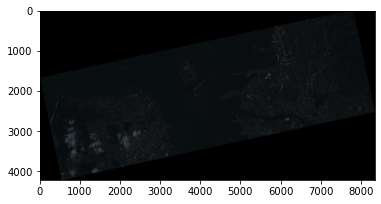

In [5]:
import matplotlib.pyplot as plt 
import cv2
import numpy as np
img=cv2.imread(image_file)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist,bins = np.histogram(img.ravel(),255,[0,255])
plt.imshow(img)

In [6]:
# satdat is our open dataset object
print(satdat)

# let's look at some basic information about this geoTIFF:

# dataset name
print(satdat.name)

# number of bands in this dataset
print(satdat.count)

<open DatasetReader name='20190321_174348_0f1a_3B_AnalyticMS.tif' mode='r'>
20190321_174348_0f1a_3B_AnalyticMS.tif
4


## Parsing bands

In [7]:
# The dataset reports a band count.
print(satdat.count)

# And provides a sequence of band indexes.  These are one indexing, not zero indexing like Numpy arrays.
print(satdat.indexes)

4
(1, 2, 3, 4)


Because we know we're look at a PlanetScope 4-band analytic satellite image, we can define the bands by their order:

In [9]:
# PlanetScope 4-band band order: BGRN

blue, green, red, nir = satdat.read()

# Or the slightly less efficient:
blue = satdat.read(1)
green = satdat.read(2)
red = satdat.read(3)
nir = satdat.read(4)

# Or read the entire dataset into a single 3D array:
#    data = satdat.read()

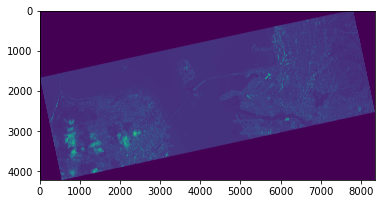

In [10]:
#print(blue.dtype)
plt.imshow(blue)


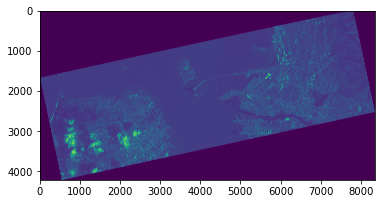

In [11]:
#print(blue.dtype)
plt.imshow(green)


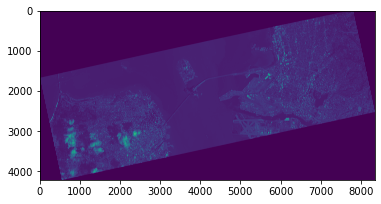

In [12]:
#print(blue.dtype)
plt.imshow(red)


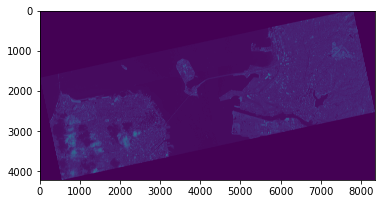

In [13]:
# each band is stored as a numpy array, and its values are a numpy data type
#print(blue.dtype)
plt.imshow(nir)


In [6]:
# using the blue band as an example, examine the width & height of the image (in pixels)

w = blue.shape[0]
h = blue.shape[1]

print("width: {w}, height: {h}".format(w=w, h=h))

width: 4213, height: 8341
